In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

import seaborn as sns
%matplotlib inline

In [2]:
base_dir = "./"

In [3]:
dict_run_auc_diff = {}
dict_run_mse_diff = {}
for cur_run in np.arange(1,4):
    print("cur_run: ",cur_run)
    fname_auc_diff = base_dir+"run_"+str(cur_run)+"/diff_auc.csv"
    fname_mse_diff = base_dir+"run_"+str(cur_run)+"/diff_mse.csv"
    print("fname_auc_diff: ",fname_auc_diff)
    print("fname_mse_diff: ",fname_mse_diff)
    df_auc_diff = pd.read_csv(fname_auc_diff)
    df_auc_diff.columns = ['Dataset', 'dfmf', 'dcmf', 'cmf', 'gcmf']
    df_mse_diff = pd.read_csv(fname_mse_diff)
    df_mse_diff.columns = ['Dataset', 'dfmf', 'dcmf', 'cmf', 'gcmf']
    df_auc_diff.set_index("Dataset",inplace=True)
    df_mse_diff.set_index("Dataset",inplace=True)
    dict_run_auc_diff[cur_run] = df_auc_diff
    dict_run_mse_diff[cur_run] = df_mse_diff
    

cur_run:  1
fname_auc_diff:  ./run_1/diff_auc.csv
fname_mse_diff:  ./run_1/diff_mse.csv
cur_run:  2
fname_auc_diff:  ./run_2/diff_auc.csv
fname_mse_diff:  ./run_2/diff_mse.csv
cur_run:  3
fname_auc_diff:  ./run_3/diff_auc.csv
fname_mse_diff:  ./run_3/diff_mse.csv


In [4]:
# def get_mean_std(dict_run_auc_diff):
#     list_df = list(dict_run_auc_diff.values())
#     return p.mean(list_df), np.std(np.mean(list_df))

In [5]:
def get_mean_sd(dict_run_auc_diff):
    #
    #mean
    #
    num_runs = 3
    df_auc_diff_sum = None
    for cur_run in np.arange(1,num_runs+1):
        if cur_run in [1]:
            df_auc_diff_sum = dict_run_auc_diff[cur_run]
        else:
            df_auc_diff_sum += dict_run_auc_diff[cur_run]
    df_auc_diff_mean = df_auc_diff_sum/num_runs
    #
    #var/sd
    #
    dict_run_auc_diff_arr = {}
    #
    list_baselines = ["dfmf","dcmf","cmf","gcmf"]
    list_datasets = ["dt1","ds1","ds2","ds3","dn1","dn2","dn3"]
    #
    for cur_run in dict_run_auc_diff.keys():
        cur_df = dict_run_auc_diff[cur_run]
        dict_run_auc_diff_arr[cur_run] = cur_df.to_numpy()    
    #
    dict_ij_val_list = {}
    for cur_run in dict_run_auc_diff.keys():
        for i in np.arange(len(list_datasets)):
            for j in np.arange(len(list_baselines)):
                dict_ij_val_list[(i,j)] = []
    #
    for cur_run in dict_run_auc_diff.keys():
        cur_arr = dict_run_auc_diff_arr[cur_run]
        for i in np.arange(len(list_datasets)):
            for j in np.arange(len(list_baselines)):
                dict_ij_val_list[(i,j)].append(cur_arr[i,j])
    #
    dict_ij_sd = {}
    for i in np.arange(len(list_datasets)):
        for j in np.arange(len(list_baselines)):
            dict_ij_sd[(i,j)] = np.std(dict_ij_val_list[(i,j)])
    #
    #back to --> arr --> df
    sd_arr = np.zeros((len(list_datasets),len(list_baselines)))
    for i in np.arange(len(list_datasets)):
        for j in np.arange(len(list_baselines)):
            sd_arr[i,j] = dict_ij_sd[(i,j)]
    #
    df_auc_diff_std = pd.DataFrame(sd_arr)
    df_auc_diff_std.columns = list_baselines
    df_auc_diff_std.index = list_datasets
    #
    return df_auc_diff_mean, df_auc_diff_std

In [6]:
dict_run_auc_diff

{1:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1      0.189218  0.100191  0.188604  0.201243
 ds1      0.346837  0.197779  0.341809  0.340072
 ds2      0.106287  0.106597  0.105852  0.103803
 ds3      0.188069  0.196405  0.200350  0.185285
 dn1      0.201764  0.207658  0.205855  0.207630
 dn2      0.077477  0.066959  0.079916  0.071077
 dn3      0.125271  0.134245  0.120778  0.125312,
 2:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1      0.235765  0.212475  0.245082  0.236503
 ds1      0.215488  0.219622  0.209310  0.209541
 ds2      0.212262  0.220285  0.210018  0.214071
 ds3      0.219635  0.234257  0.218815  0.215866
 dn1      0.271417  0.267813  0.269672  0.272373
 dn2      0.288554  0.293524  0.282782  0.285937
 dn3      0.258187  0.277209  0.258117  0.261520,
 3:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1     

In [7]:
df_auc_diff_mean, df_auc_diff_std = get_mean_sd(dict_run_auc_diff)

In [8]:
#

In [9]:
dict_run_mse_diff

{1:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1      0.017941  0.011521 -0.015957 -0.077473
 ds1     -0.035081  0.004000 -0.017072 -0.053287
 ds2     -0.031011 -0.066613 -0.041973 -0.089686
 ds3      0.004819 -0.045837 -0.052991 -0.061358
 dn1      0.005647 -0.066929 -0.074880 -0.116941
 dn2      0.009108 -0.069217 -0.020171 -0.080364
 dn3     -0.024561 -0.107551 -0.054386 -0.124803,
 2:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1      0.030041 -0.050911 -0.006737 -0.064353
 ds1     -0.049873 -0.063006 -0.025338 -0.071314
 ds2     -0.024422 -0.058579 -0.033050 -0.069820
 ds3     -0.004845 -0.045279 -0.051261 -0.068929
 dn1      0.009289 -0.074312 -0.097433 -0.131913
 dn2     -0.001310 -0.082008 -0.046073 -0.099643
 dn3     -0.043795 -0.121588 -0.077147 -0.116946,
 3:              dfmf      dcmf       cmf      gcmf
 Dataset                                        
 dt1     

In [10]:
df_mse_diff_mean, df_mse_diff_std = get_mean_sd(dict_run_mse_diff)

In [11]:
df_mse_diff_mean

,dfmf,dcmf,cmf,gcmf
Dataset,,,,
dt1,0.027273,-0.032764,-0.010232,-0.066975
ds1,-0.044169,-0.041275,-0.025772,-0.063513
ds2,-0.033817,-0.066840,-0.041538,-0.088384
ds3,-0.000388,-0.044393,-0.047193,-0.071370
dn1,0.004533,-0.072653,-0.080990,-0.121367
dn2,-0.007516,-0.092550,-0.054325,-0.106250
dn3,-0.023412,-0.105779,-0.070686,-0.117144


In [12]:
df_mse_diff_std

,dfmf,dcmf,cmf,gcmf
dt1,0.023564,0.020711,0.011008,0.065654
ds1,0.039512,0.028252,0.022588,0.057512
ds2,0.032442,0.063334,0.039842,0.084905
ds3,0.001741,0.042215,0.046212,0.065212
dn1,0.006277,0.067156,0.075711,0.113587
dn2,0.012269,0.083744,0.047866,0.095417
dn3,0.028143,0.101071,0.062816,0.112289


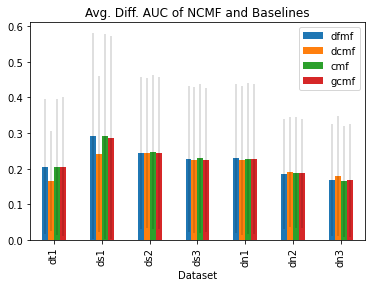

In [13]:
fig = df_auc_diff_mean.plot.bar(title="Avg. Diff. AUC of NCMF and Baselines",yerr=df_auc_diff_std,error_kw=dict(ls="--", lw=.25)).get_figure()
#fig = df_auc_diff_mean.plot.bar(title="Diff. AUC of NCMF and Baselines").get_figure()
fig.savefig('auc_diff_err_bar.pdf', bbox_inches='tight')
fig.savefig('auc_diff_err_bar.png', bbox_inches='tight')


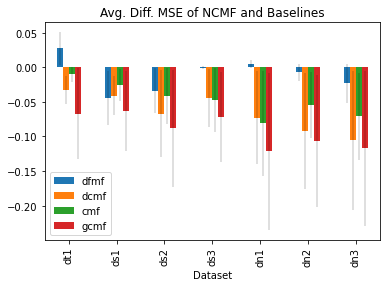

In [14]:
fig2 = df_mse_diff_mean.plot.bar(title="Avg. Diff. MSE of NCMF and Baselines",yerr=df_mse_diff_std,error_kw=dict(ls="--", lw=0.25)).get_figure()
#fig2 = df_mse_diff_mean.plot.bar(title="Diff. MSE of NCMF and Baselines").get_figure()
fig2.savefig('mse_diff_err_bar.pdf', bbox_inches='tight')
fig2.savefig('mse_diff_err_bar.png', bbox_inches='tight')

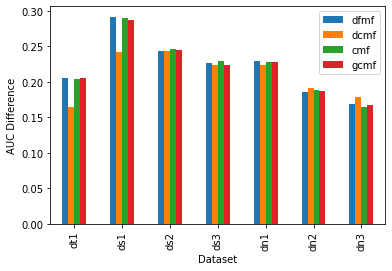

In [20]:
#fig = df_auc_diff_mean.plot.bar(title="Avg. Diff. AUC of NCMF and Baselines").get_figure()
fig = df_auc_diff_mean.plot.bar(ylabel="AUC Difference").get_figure()
fig.savefig('auc_diff.pdf', bbox_inches='tight')
fig.savefig('auc_diff.png', bbox_inches='tight')

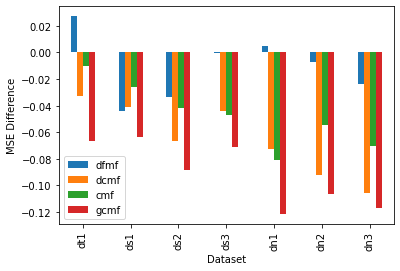

In [21]:
#fig2 = df_mse_diff_mean.plot.bar(title="Avg. Diff. MSE of NCMF and Baselines").get_figure()
fig2 = df_mse_diff_mean.plot.bar(ylabel="MSE Difference").get_figure()
fig2.savefig('mse_diff.pdf', bbox_inches='tight')
fig2.savefig('mse_diff.png', bbox_inches='tight')